In [1]:
!wget --no-check-certificate \
    "https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip" \
    -O "/content/sample_data/FingerPrint.zip"

--2023-05-04 05:07:04--  https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main [following]
--2023-05-04 05:07:04--  https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/sample_data/FingerPrint.zip’

/content/sample_dat     [  <=>               ]   4.19M  12.8MB/s    in 0.3s    

2023-05-04 05:07:05 (12.8 MB/s) - ‘/content/sample_data/FingerPrint.zip’ saved [4394944]



In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sample_data/FingerPrint.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/sample_data/') #Extracts the files into the /tmp folder
zip_ref.close()

In [3]:
mkdir '/content/sample_data/LowResolution'

In [4]:
from PIL import Image
import os

# Define the input and output directories
input_dir = '/content/sample_data/FingerPrintData-main/DB1_B'
output_dir = '/content/sample_data/LowResolution'



scale_factor = 0.2

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    # Load the image
    input_image = Image.open(os.path.join(input_dir, filename))
    new_size = (int(input_image.size[0] * scale_factor), int(input_image.size[1] * scale_factor))
    output_image = input_image.resize(new_size, resample=Image.LANCZOS)   
    # Save the output image to the output directory
    output_image.save(os.path.join(output_dir, filename))

In [5]:
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

2.12.0


In [6]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/content/sample_data/FingerPrintData-main/DB1_B'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):       
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 352.53it/s]


In [7]:
low_img = []
path = '/content/sample_data/LowResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '855.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 1354.29it/s]


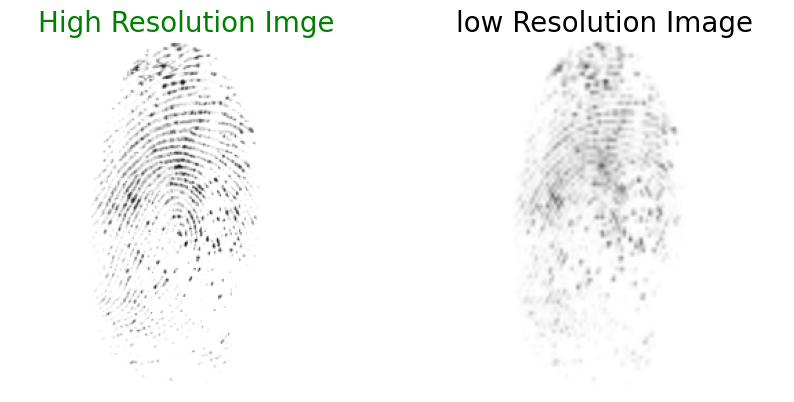

In [8]:
for i in range(1):
    a = np.random.randint(0,105)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [9]:
train_high_image = high_img[:55]
train_low_image = low_img[:55]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[55:60]
validation_low_image = low_img[55:60]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[60:]
test_low_image = low_img[60:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (55, 256, 256, 3)
Shape of test images: (6, 256, 256, 3)
Shape of validation images: (5, 256, 256, 3)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      15616     
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 3)       2403      
                                                                 
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


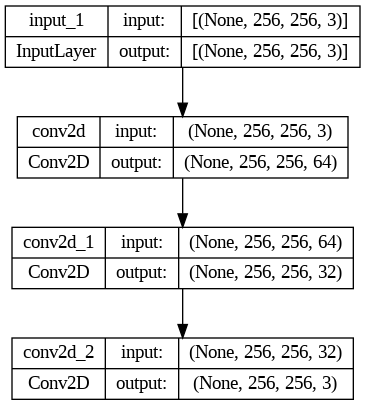

In [10]:
from keras import layers

input_img=Input(shape=(256,256,3))
l1=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input_img)
l2=tf.keras.layers.Conv2D(32,1,padding='same',activation='relu') (l1)
l3=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (l2)


SRCNN=Model(input_img,l3)


def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )
SRCNN.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=pixel_mse_loss)
SRCNN.summary()
plot_model(SRCNN, to_file ='super_res.png',show_shapes=True)

In [11]:
SRCNN.fit(train_low_image, train_high_image, epochs = 20, batch_size = 1,
          validation_data = (validation_low_image,validation_high_image))

Epoch 1/20
55/55 [==============================] - 11s 11ms/step - loss: 0.0884 - val_loss: 0.0161
Epoch 2/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0143 - val_loss: 0.0104
Epoch 3/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0116 - val_loss: 0.0090
Epoch 4/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0085
Epoch 5/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0125 - val_loss: 0.0162
Epoch 6/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0129 - val_loss: 0.0082
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0094 - val_loss: 0.0075
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 9/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 11/20
55/55

In [12]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

1/1 [==============================] - 0s 157ms/step


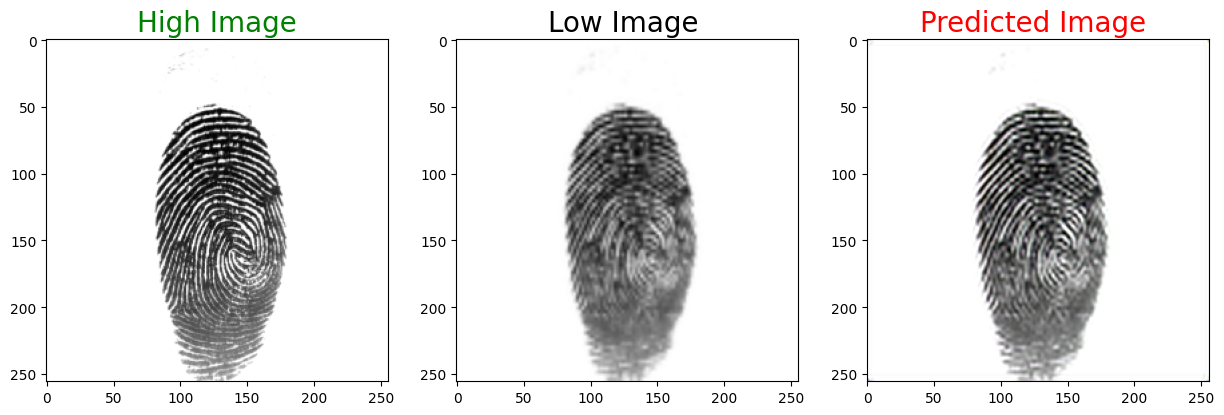

PSNR tf.Tensor(22.530994, shape=(), dtype=float32) dB SSIM tf.Tensor(0.89519054, shape=(), dtype=float32)
1/1 [==============================] - 0s 21ms/step


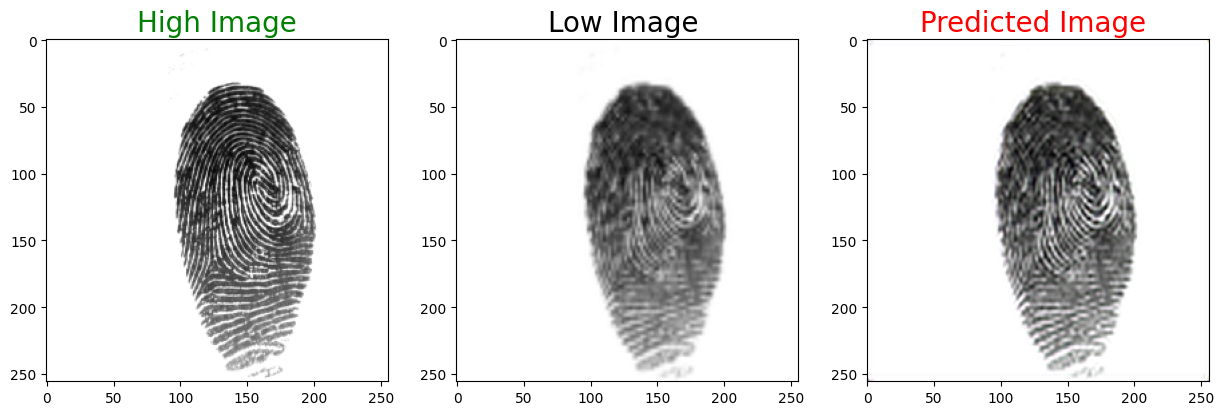

PSNR tf.Tensor(22.667961, shape=(), dtype=float32) dB SSIM tf.Tensor(0.8713507, shape=(), dtype=float32)
1/1 [==============================] - 0s 23ms/step


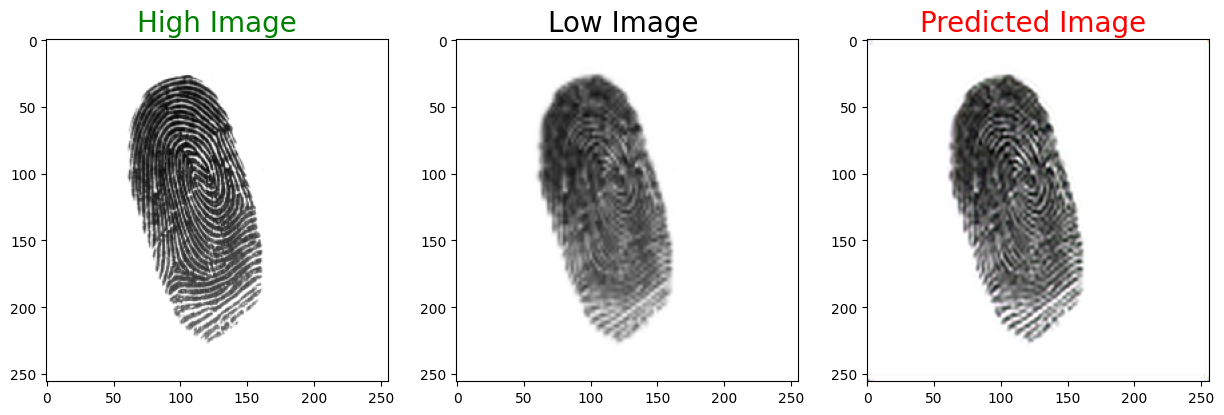

PSNR tf.Tensor(22.834501, shape=(), dtype=float32) dB SSIM tf.Tensor(0.88076717, shape=(), dtype=float32)
1/1 [==============================] - 0s 18ms/step


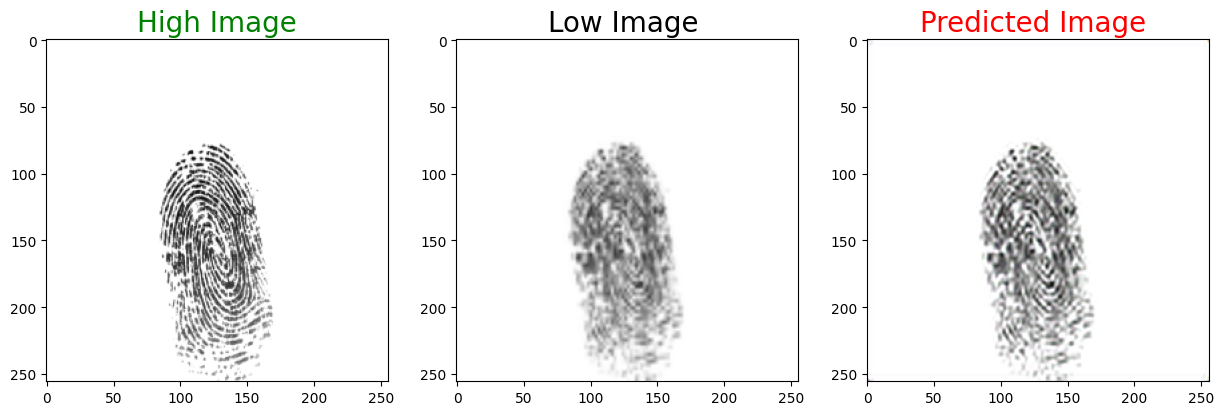

PSNR tf.Tensor(22.626188, shape=(), dtype=float32) dB SSIM tf.Tensor(0.91523457, shape=(), dtype=float32)
1/1 [==============================] - 0s 20ms/step


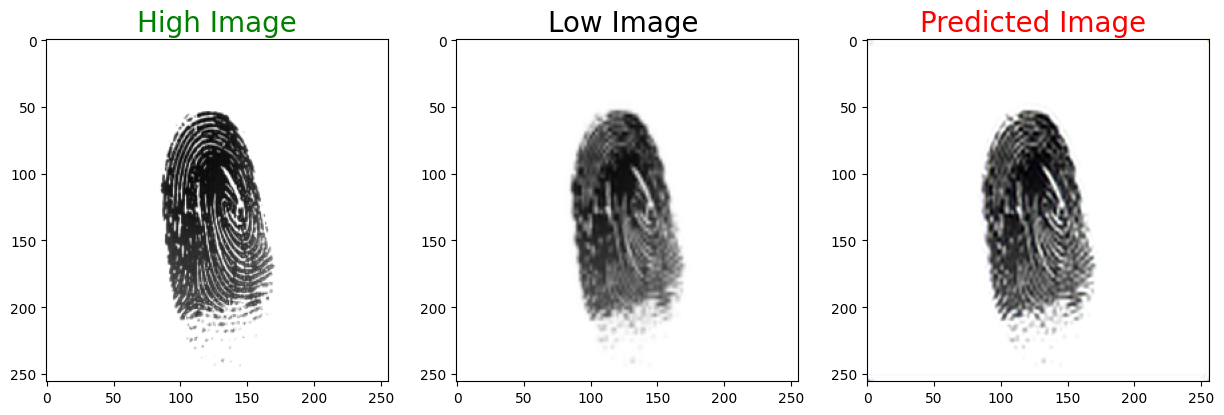

PSNR tf.Tensor(24.167974, shape=(), dtype=float32) dB SSIM tf.Tensor(0.91617775, shape=(), dtype=float32)
1/1 [==============================] - 0s 18ms/step


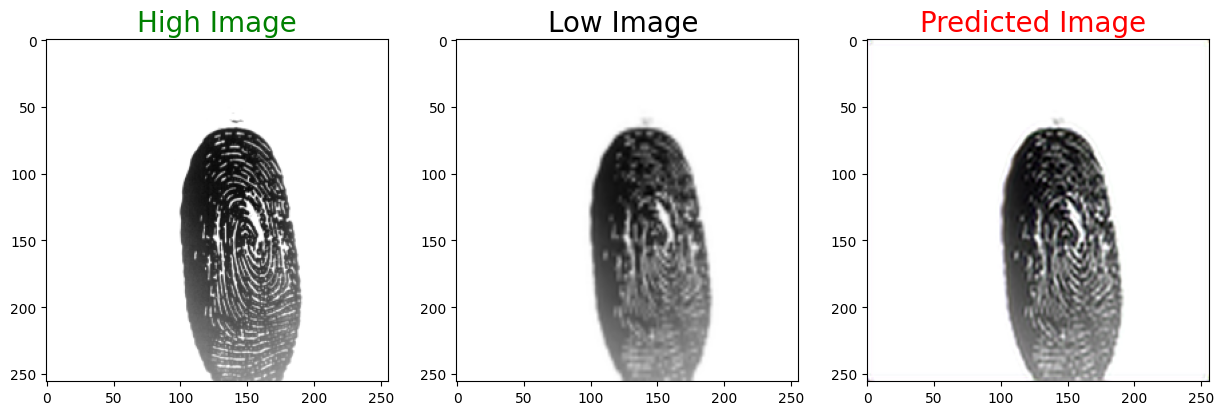

PSNR tf.Tensor(25.006048, shape=(), dtype=float32) dB SSIM tf.Tensor(0.91576433, shape=(), dtype=float32)


In [13]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(0,6):
    predicted = np.clip(SRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    print('PSNR',PSNR(test_high_image[i],predicted),'dB', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))